# Afinación de parámetros de modelos en sklearn

* 13:55 min | Ultima modificación: Abril 13, 2021 | [YouTube](https://youtu.be/foFXzXz3GrM)

Este tutorial demuestra como obtener la mejor combinación de hiperparámetros posibles de un modelo usando cross-validation.

## Carga de datos

In [1]:
#
# Carga de datos del dataset del iris
#
from sklearn import datasets

data = datasets.load_iris()

#
# Carga de datos.
#   Se verifica la cantidad de datos de la muestra
#
X, y = data.data, data.target
print(X.shape, y.shape)

(150, 4) (150,)


## Partición de los datos

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=33,
)

## Preprocesamiento

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creación de la malla de datos

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

#
# La variable tuned_parameters es una lista de diccionarios
# que contiene los valores que pueden ajustarse
#
parameters = [
    {
        "penalty": ["none"],
    },
    {
        "penalty": ["l2"],
        "alpha": [0.00001, 0.00002, 0.00003],
    },
    {
        "penalty": ["l1"],
        "alpha": [
            0.00001,
            0.00002,
            0.00003,
        ],
        "l1_ratio": [
            0.10,
            0.15,
            0.20,
        ],
    },
]

#
# Construye la malla de hiperparámetros
#
clf = GridSearchCV(
    SGDClassifier(),
    parameters,
    cv=5,
)

#
# Entrenamiento de todos los modelos y selección
# de la combinación óptima de parámetros
#
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'penalty': ['none']},
                         {'alpha': [1e-05, 2e-05, 3e-05], 'penalty': ['l2']},
                         {'alpha': [1e-05, 2e-05, 3e-05],
                         

In [5]:
#
# Combinaciones usadas de hiperparámetros
#
clf.cv_results_

{'mean_fit_time': array([0.0018321 , 0.00170088, 0.00162401, 0.0016674 , 0.00169454,
        0.00172825, 0.00167127, 0.0021934 , 0.0017415 , 0.00169277,
        0.00167446, 0.00170364, 0.00171952]),
 'std_fit_time': array([1.65729047e-04, 1.03737017e-04, 1.48077709e-05, 4.35040677e-05,
        4.63601479e-05, 6.73538858e-05, 5.07237754e-05, 6.63819245e-04,
        6.01385239e-05, 5.61071410e-05, 3.95434015e-05, 4.15509891e-05,
        9.21261730e-05]),
 'mean_score_time': array([0.00028291, 0.00024338, 0.00024557, 0.00025244, 0.000245  ,
        0.00024853, 0.00025454, 0.00032063, 0.00023899, 0.00023942,
        0.0002573 , 0.00024095, 0.0002521 ]),
 'std_score_time': array([6.53669832e-05, 1.26189889e-05, 2.32425712e-05, 2.88860221e-05,
        2.48507655e-05, 2.32130088e-05, 2.30009559e-05, 8.86982997e-05,
        2.32095803e-05, 2.44284937e-05, 2.69315499e-05, 1.89722474e-05,
        2.74347587e-05]),
 'param_penalty': masked_array(data=['none', 'l2', 'l2', 'l2', 'l1', 'l1', 'l1', '

In [6]:
#
# Mejor modelo
#
clf.best_estimator_

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='none',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [7]:
#
# Coeficientes del mejor modelo
#
clf.best_estimator_.coef_

array([[-18.66517354,  20.01738105, -17.2089447 , -14.52934805],
       [ -5.0385267 ,  -5.6111228 ,  24.11005925, -11.94619494],
       [ -4.8744768 ,  -5.31106858,  39.20509965,  38.72057005]])

In [8]:
#
# Interceptos del mejor modelo
#
clf.best_estimator_.intercept_

array([-10.05881828,  -0.47915639, -58.09332929])

## Precisión del modelo

In [9]:
from sklearn import metrics

#
# Pronóstico para el conjunto de entrenamiento
#
y_train_pred = clf.predict(X_train)

#  Precisión para el conjunto de entrenamiento
metrics.accuracy_score(y_train, y_train_pred)

0.9732142857142857

In [10]:
# Precisión para el conjunto de prueba
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8947368421052632

## Reporte de clasificación

In [11]:
#
# Métricas de evaluación
#
print(
    metrics.classification_report(
        y_test,
        y_pred,
        target_names=data.target_names,
    )
)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.73      1.00      0.85        11
   virginica       1.00      0.79      0.88        19

    accuracy                           0.89        38
   macro avg       0.91      0.93      0.91        38
weighted avg       0.92      0.89      0.90        38



## Matriz de confusión

In [12]:
metrics.confusion_matrix(y_test, y_pred)

#
# Note que en el ejemplo del tutorial anterior.
#
# array([[ 8,  0,  0],
#        [ 5,  1,  5],
#        [ 0,  0, 19]])
#

array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  4, 15]])

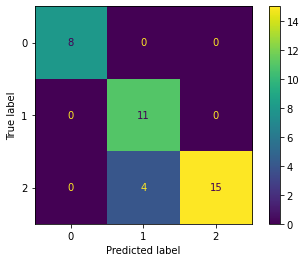

In [13]:
from sklearn.metrics import plot_confusion_matrix

#
# Note que la función computa internamente
# el pronósitco del clasificador
#
plot_confusion_matrix(
    clf,     #  clasificador entrenado
    X_test,  # matriz de variables de entrada
    y_test,  #  valor real
)  